####  *Import the Necessary Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [2]:
data = pd.read_csv('Uber Drives.csv')

In [3]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


#### *Check for missing values*

In [8]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

#### *Drop the missing values*

In [9]:
new_data= data.dropna()

In [11]:
new_data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [12]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

#### *Converting the Date columns to datetime*

In [17]:
new_data['START_DATE*'] = pd.to_datetime(new_data['START_DATE*'], format= '%m/%d/%Y %H:%M')
new_data['END_DATE*'] = pd.to_datetime(new_data['END_DATE*'], format= '%m/%d/%Y %H:%M')

/var/folders/8j/5mg1hqbx0rxgbv5q60g_dhhc0000gn/T/ipykernel_3461/3870448998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['START_DATE*'] = pd.to_datetime(new_data['START_DATE*'], format= '%m/%d/%Y %H:%M')
/var/folders/8j/5mg1hqbx0rxgbv5q60g_dhhc0000gn/T/ipykernel_3461/3870448998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['END_DATE*'] = pd.to_datetime(new_data['END_DATE*'], format= '%m/%d/%Y %H:%M')


In [16]:
new_data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [18]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in new_data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
    
new_data['HOUR'] = hour
new_data['DAY'] = day
new_data['DAY OF WEEK'] = dayofweek
new_data['MONTH'] = month
new_data['WEEKDAY'] = weekday

/var/folders/8j/5mg1hqbx0rxgbv5q60g_dhhc0000gn/T/ipykernel_3461/2710508641.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['HOUR'] = hour
/var/folders/8j/5mg1hqbx0rxgbv5q60g_dhhc0000gn/T/ipykernel_3461/2710508641.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['DAY'] = day
/var/folders/8j/5mg1hqbx0rxgbv5q60g_dhhc0000gn/T/ipykernel_3461/2710508641.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [19]:
new_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


#### *Check for Category*

In [25]:
new_data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

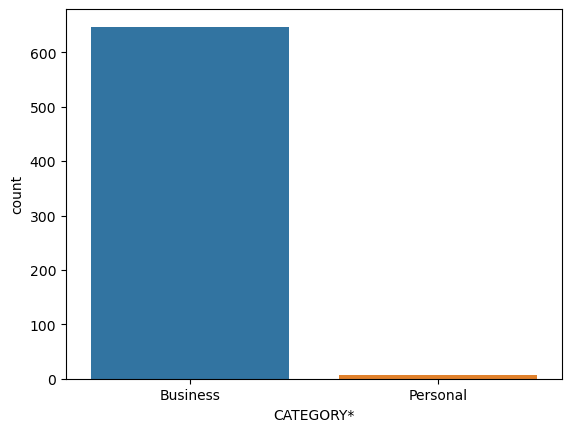

In [27]:
sns.countplot(x='CATEGORY*', data=new_data)
plt.show()

#### *How long people travel with Uber*

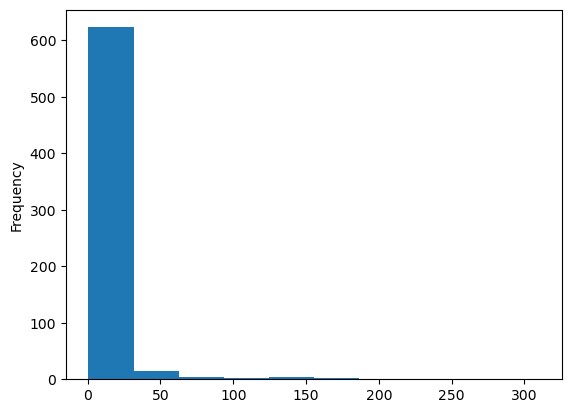

In [30]:
new_data['MILES*'].plot.hist()
plt.show()

#### *What hour do people take Uber the most*

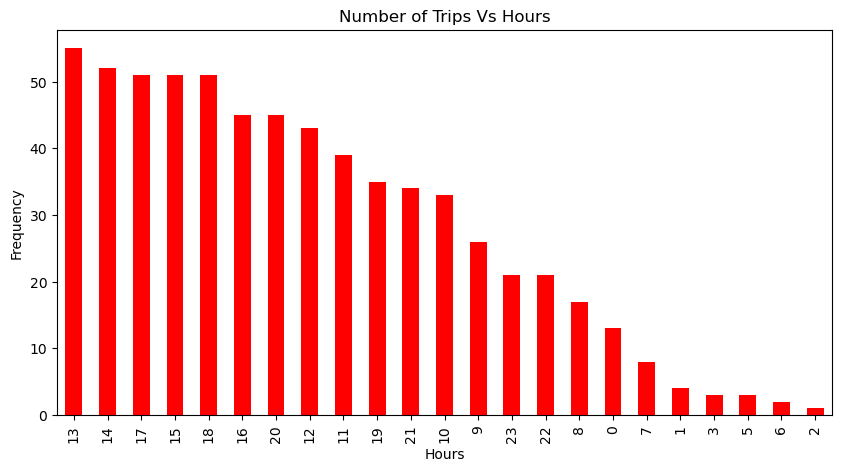

In [31]:
hours = new_data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar', color='red', figsize=(10,5))

plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips Vs Hours')
plt.show()


#### *What is the purpose of the trip*

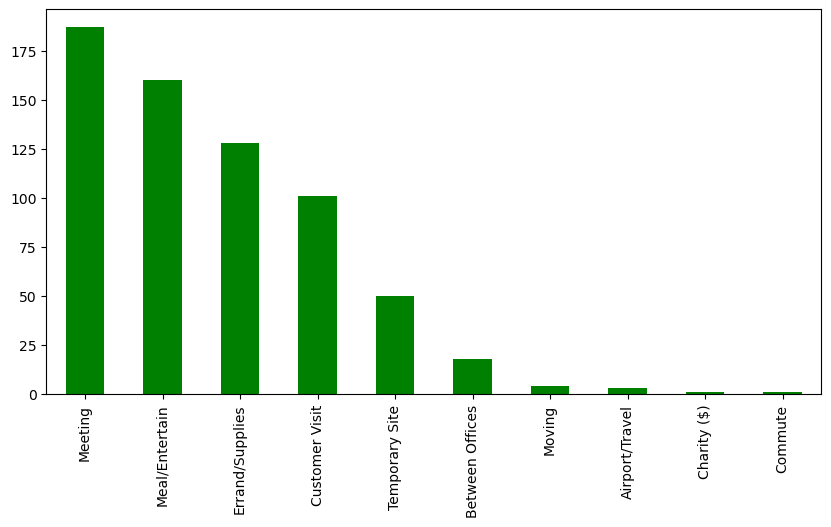

In [37]:
new_data['PURPOSE*'].value_counts().plot(kind='bar', figsize=(10,5),color='green')
plt.show()

#### *Day with the highest number of trip*

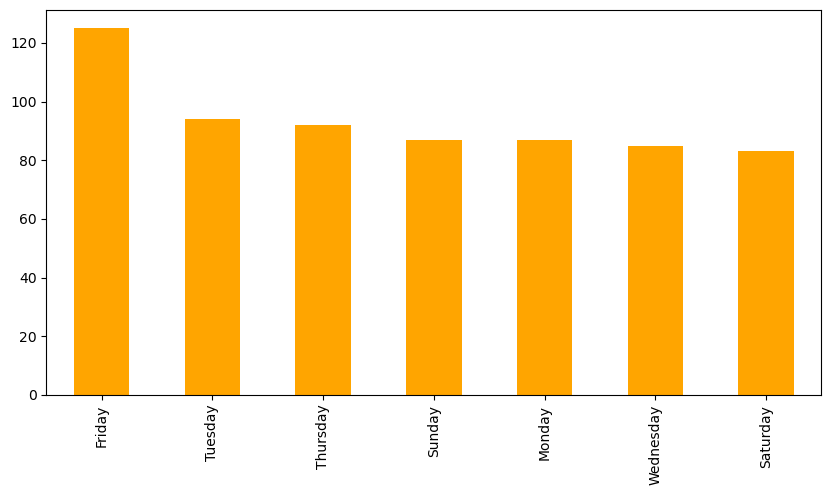

In [39]:
new_data['WEEKDAY'].value_counts().plot(kind='bar', figsize=(10,5), color='orange')
plt.show()

#### *What are the number of trips per day*

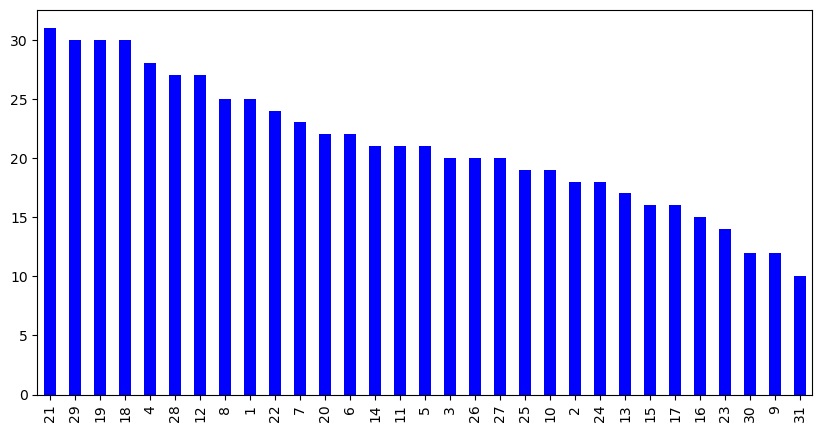

In [40]:
new_data['DAY'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')
plt.show()

#### *What are the trips in the Month*

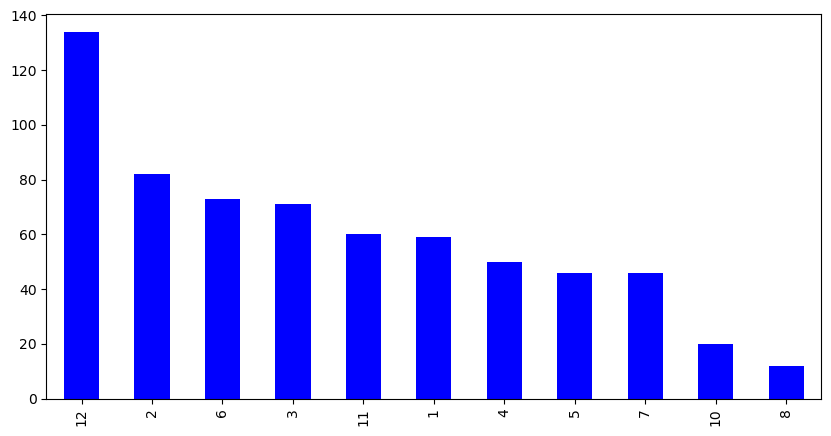

In [42]:
new_data['MONTH'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')
plt.show()

#### *Where do people start their trip the most*

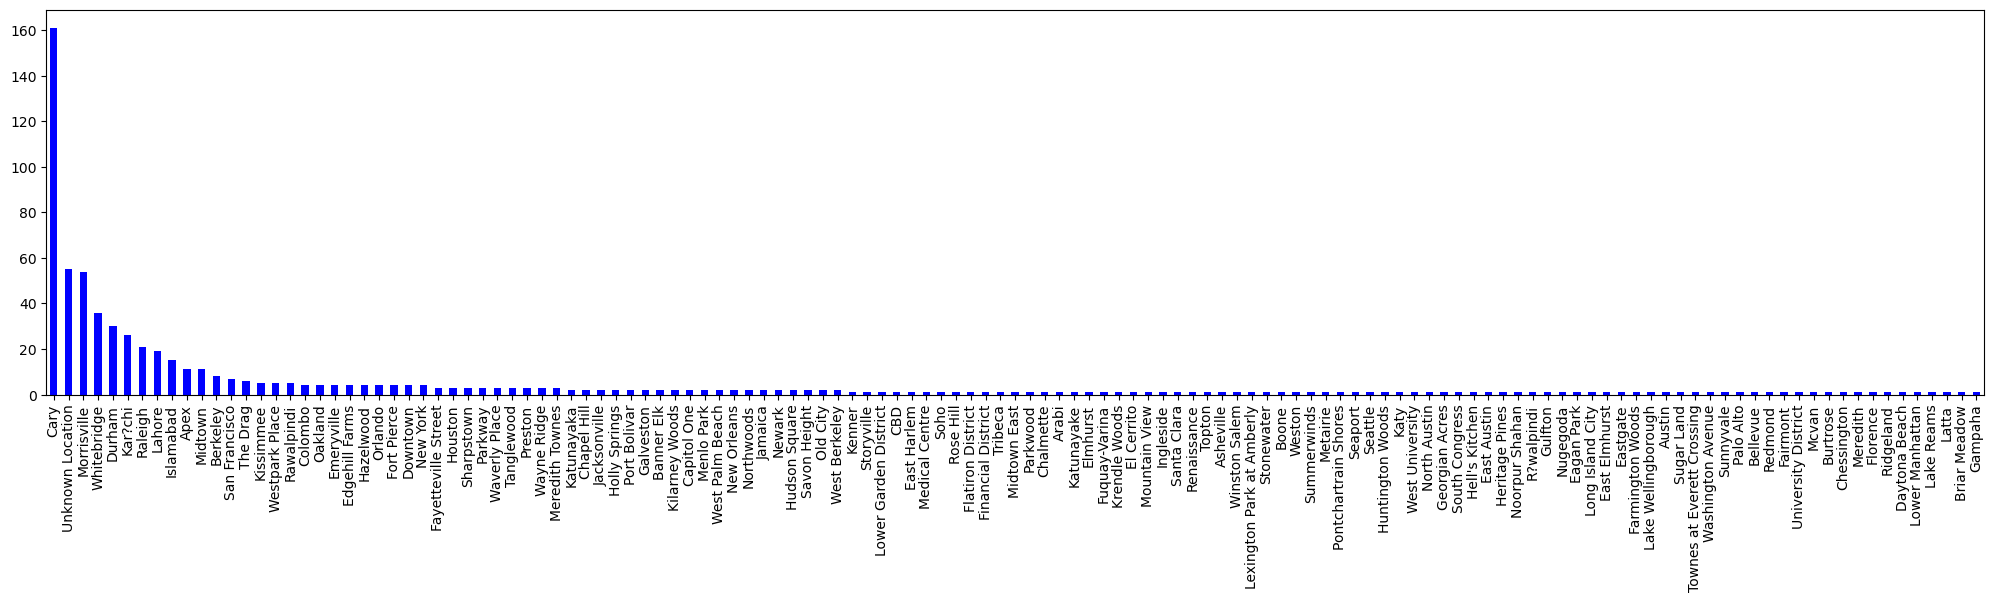

In [45]:
new_data['START*'].value_counts().plot(kind='bar', figsize=(25,5), color='blue')
plt.show()